## 🔰 Day 3 - Assignment (2024.11.27)

In [15]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets
import torchvision.transforms as transforms

from torch.optim import Adam
from torch.nn import Linear, Sigmoid, BCELoss, Module, Softmax, ReLU, CrossEntropyLoss, Sequential
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# import fasion MNIST data
from tensorflow.keras.datasets.fashion_mnist import load_data

In [ ]:
# list of label name
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [4]:
# load fasion mnist data
(x_train,y_train),(x_test,y_test) = load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# check size
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

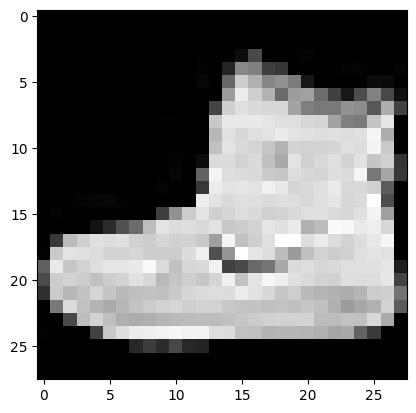

In [ ]:
# plot of the first image
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [11]:
# label of the first image
y_train[0]

9

---

### 1️⃣ 정규화

In [13]:
# make tensor node
x = torch.FloatTensor(x_train.reshape(60000, 28*28) / 255)
y = torch.LongTensor(y_train)

---

### 2️⃣ 딥러닝 학습 (Sequential 방식)

In [ ]:
# training
model = Sequential()

model.add_module('nn1', Linear(784, 64))
model.add_module('relu1', ReLU())

model.add_module('nn2', Linear(64, 32))
model.add_module('relu2', ReLU())

model.add_module('nn3', Linear(32, 10))
model.add_module('soft3', Softmax(dim=1))

loss_fn = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.01)

for epoch in range(200):
    optimizer.zero_grad()
    hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()

    _, idx = hx.max(dim=1)
    pred = idx.numpy()
    accuracy = accuracy_score(y.numpy(), pred)

    print(f'Epoch [{epoch + 1}/200] | Loss: {cost.item():.4f} | Accuracy: {accuracy:.4f}')

Epoch [1/200] | Loss: 2.3023 | Accuracy: 0.0996
Epoch [2/200] | Loss: 2.2835 | Accuracy: 0.1526
Epoch [3/200] | Loss: 2.2393 | Accuracy: 0.3328
Epoch [4/200] | Loss: 2.1709 | Accuracy: 0.3691
Epoch [5/200] | Loss: 2.1133 | Accuracy: 0.3893
Epoch [6/200] | Loss: 2.0556 | Accuracy: 0.4594
Epoch [7/200] | Loss: 2.0310 | Accuracy: 0.4549
Epoch [8/200] | Loss: 1.9899 | Accuracy: 0.4661
Epoch [9/200] | Loss: 1.9462 | Accuracy: 0.5500
Epoch [10/200] | Loss: 1.9186 | Accuracy: 0.5991
Epoch [11/200] | Loss: 1.8881 | Accuracy: 0.6159
Epoch [12/200] | Loss: 1.8870 | Accuracy: 0.5967
Epoch [13/200] | Loss: 1.8612 | Accuracy: 0.6149
Epoch [14/200] | Loss: 1.8461 | Accuracy: 0.6287
Epoch [15/200] | Loss: 1.8431 | Accuracy: 0.6391
Epoch [16/200] | Loss: 1.8305 | Accuracy: 0.6468
Epoch [17/200] | Loss: 1.8210 | Accuracy: 0.6482
Epoch [18/200] | Loss: 1.8181 | Accuracy: 0.6554
Epoch [19/200] | Loss: 1.8108 | Accuracy: 0.6528
Epoch [20/200] | Loss: 1.8035 | Accuracy: 0.6649
Epoch [21/200] | Loss: 1.7947

---

### 3️⃣ x_test 0번째 이미지의 예측값 확인

In [ ]:
# predict of x_test first image
print(f'This image is [{text_labels[y_test[0]]}]')

This image is [ankle boot]


---